In [1]:
import sys
sys.path.append("../../")
import bandicoot as bc
import numpy as np
import pandas as pd
from datetime import datetime as dt
import bandicoot_dev as bc_d
import bandicoot as bc
from build_dataset.workers import load_sensible_data as lsd
from build_dataset.workers import apply_time_constraints as atc

In [2]:
tc0 = {'hours': range(24), 'days': range(7), 'spans': [("06/01/14","24/01/14"), ("03/02/14","16/05/14"), ("01/09/14","05/12/14"), ("02/06/14","20/06/14")]}
tc1 = {'hours': range(24), 'days': range(7), 'spans': [("17/05/14","01/06/14"), ("06/12/14", "21/12/14")]}
tc2 = {'hours': range(24), 'days': range(7), 'spans': [("01/01/14","05/01/14"), ("25/01/14","02/02/14"), ("14/04/14","20/04/14"), ("21/06/14","30/08/14"), ("22/12/14", "31/12/14")]}

In [3]:
df_call = lsd.load(tc0['spans'], "calllog")
df_call = atc.apply(df_call, tc0)
df_sms = lsd.load(tc0['spans'], "sms")
df_sms = atc.apply(df_sms, tc0)

<2014> jan feb mar apr may jun sep oct nov dec <2014> jan feb mar apr may jun sep oct nov dec


In [4]:
users = set(list(df_call['user'])) & set(list(df_sms['user']))

In [5]:
for u in users:
    df_call_u = df_call[df_call['user'] == u]
    df_sms_u = df_sms[df_sms['user'] == u]
    
    break
    
    # filter
    df_call_u = df_call_u.drop('user', 1)
    
    # columns
    df_call_u['interaction'] = "call"
    df_call_u['timestamp'] = [dt.fromtimestamp(t) for t in df_call_u['timestamp']/1000]
    df_call_u['type'] = ["in" if t == 1 else "out" for t in df_call_u['type']]
    
    df_call_u.columns = ["call_duration", "correspondent_id", "datetime", "direction", "interaction"]
    
    # filter
    df_sms_u = df_sms_u[df_sms_u['status'] <= 0]
    df_sms_u = df_sms_u[df_sms_u['type'] <= 2]
    df_sms_u = df_sms_u.drop('status', 1)
    df_sms_u = df_sms_u.drop('user', 1)
    
    # columns
    df_sms_u['interaction'] = "text"
    df_sms_u['timestamp'] = [dt.fromtimestamp(t) for t in df_sms_u['timestamp']/1000]
    df_sms_u['type'] = ["in" if t == 1 else "out" for t in df_sms_u['type']]
    df_sms_u['call_duration'] = ""

    df_sms_u.columns = ["correspondent_id", "datetime", "direction", "interaction", "call_duration"]
    
    df_u = pd.concat([df_sms_u, df_call_u]).sort(['datetime'], ascending=1)
    df_u.to_csv("records/%d.csv" % u, index=False)
    
    break

In [6]:
B = bc_d.read_csv("0", "records/")

         No antennas file was given and records are using antennas for position.
[x] 2899 records from 2014-01-06 08:55:59 to 2014-12-04 21:43:45
[x] 164 contacts
[ ] No attribute stored
[ ] No antenna stored
[x] Has home
[x] Has texts
[x] Has calls
[ ] No network


In [9]:
indicators_d = bc_d.utils.all(B, groupby="week", summary="special", dist=True)
#indicators = bc.utils.all(B, groupby="month", summary="default")

active_days
number_of_contacts
call_duration
percent_nocturnal
percent_initiated_conversations
percent_initiated_interactions
response_delay_text
response_rate_text
entropy_of_contacts
balance_of_contacts
interactions_per_contact
interevent_time
percent_pareto_interactions
percent_pareto_durations
number_of_interactions
number_of_interaction_in
number_of_interaction_out
number_of_antennas
entropy_of_antennas
percent_at_home
radius_of_gyration
frequent_antennas
churn_rate


In [10]:
exclude = ['name', 'reporting', 'number_of_antennas', 'entropy_of_antennas', 
'frequent_antennas', 'churn_rate', 'radius_of_gyration', 'percent_at_home']
for ex in exclude:
    del indicators_d[ex]

indicators_flat = bc_d.utils.flatten(indicators_d)
#indicators = filter(lambda x: type(x[1]) is list, indicators_flat.items())

In [12]:
indicators_flat

OrderedDict([('active_days__allweek__allday__callandtext',
              [7,
               7,
               4,
               7,
               7,
               6,
               4,
               7,
               7,
               7,
               6,
               6,
               7,
               7,
               5,
               7,
               7,
               4,
               7,
               7,
               4,
               7,
               6,
               7,
               7,
               7,
               7,
               7,
               7,
               7,
               6,
               7,
               6,
               7,
               4]),
             ('number_of_contacts__allweek__allday__text',
              [9,
               6,
               8,
               5,
               10,
               8,
               6,
               11,
               10,
               14,
               8,
               9,
               8,
            

TypeError: unsupported operand type(s) for +: 'SummaryStats' and 'float'

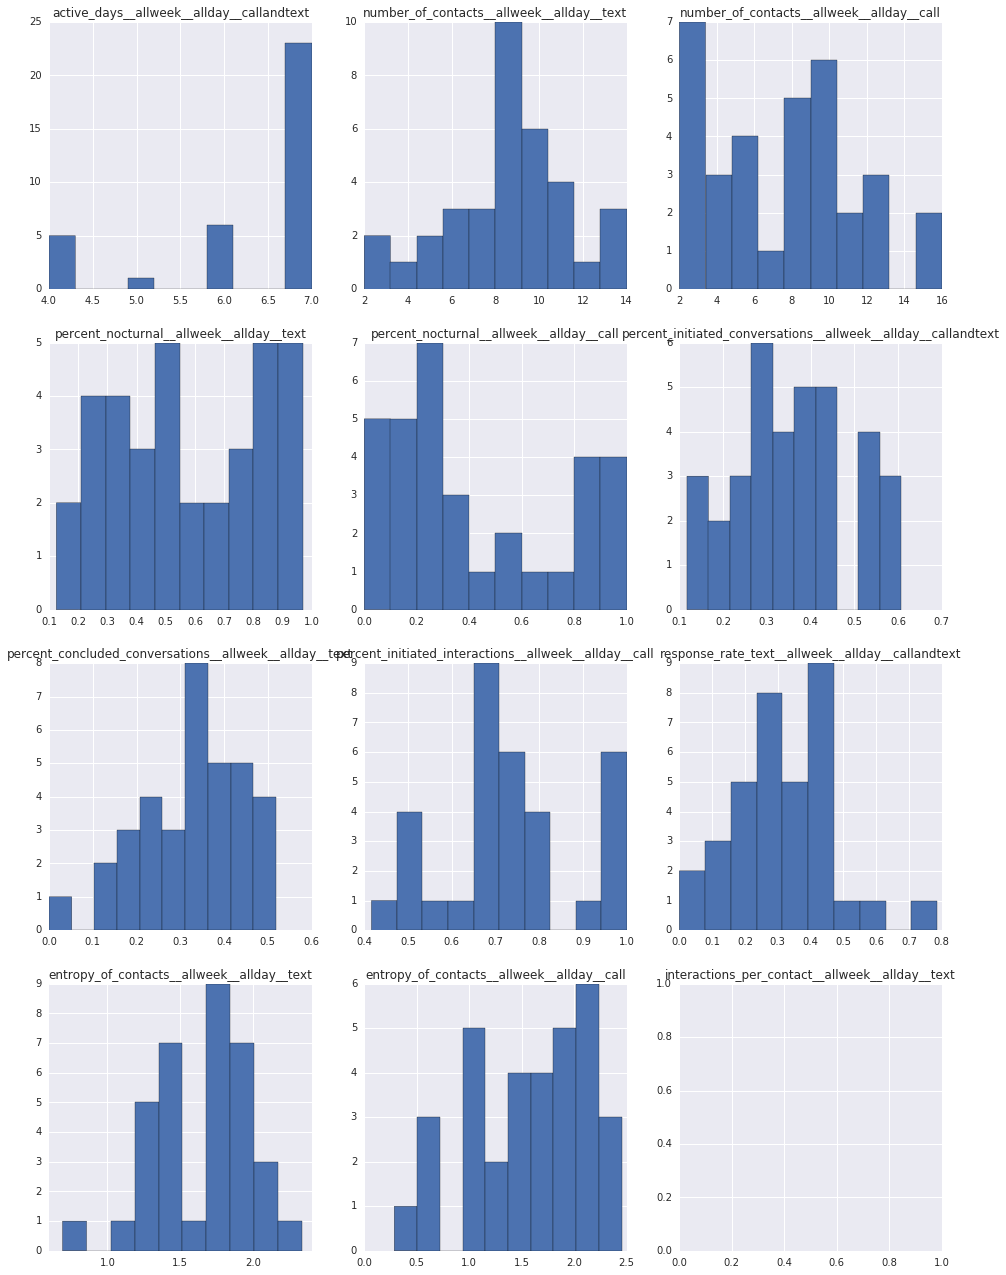

In [9]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns
plt.figure(figsize=(16,6*len(indicators)/3+1))
for i, indic in enumerate(indicators):
    plt.subplot(len(indicators)/3+1, 3, i+1)
    plt.title(indic[0])
    plt.hist(indic[1])
plt.show()

In [25]:
len(bc.utils.flatten(indicators).items()[0][1])

35

In [61]:
[r for i in [1,2] for r in [i]*2]

[1, 1, 2, 2]

In [63]:
out = []
for i in [1,2]:
    for r in [i]*2:
        out.append(r)

In [64]:
out

[1, 1, 2, 2]